In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Tiempos V1

In [2]:
TIEMPOS_DIR = "./tiempos/v1"

procesos = os.listdir(TIEMPOS_DIR)
# print(procesos)

all_data = []   
for p in procesos:
    path_tiempos = os.path.join(TIEMPOS_DIR, p)
    csv_path = os.path.join(path_tiempos, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
display(df_all.head(7))

,Step,Computo,Comunicacion,N,p
0,0,0.127579,0.285390,19051200,49
1,1,0.001622,0.059230,19051200,49
2,2,0.061488,0.011576,19051200,49
3,3,1.833847,0.000000,19051200,49
4,4,2.427878,0.000000,19051200,49
5,5,0.000000,0.031470,19051200,49
6,6,0.000000,0.000000,19051200,49


/tmp/ipykernel_3321032/1876318632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


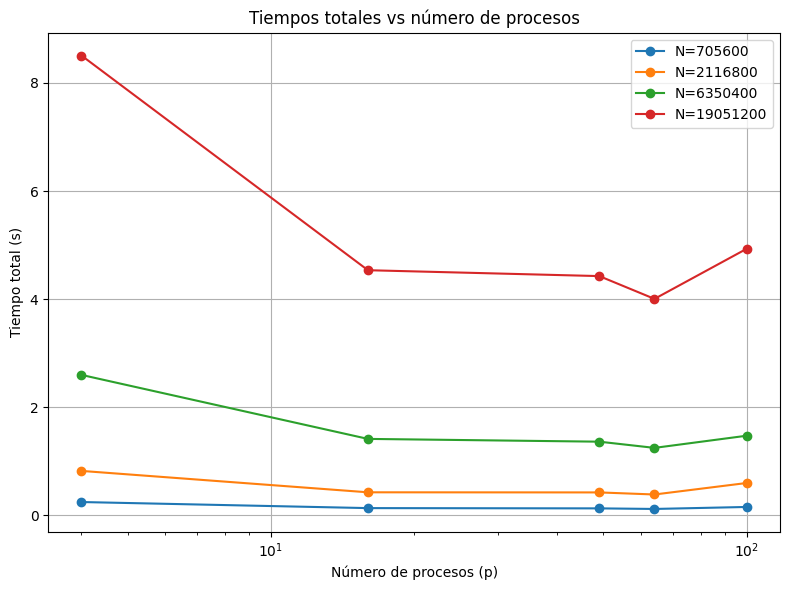

In [4]:
df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_all[df_all['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = (
    df_filtered
    .groupby(['N', 'p'], as_index=False)[['Total']].sum()
)
plt.figure(figsize=(8, 6))

for N, df_N in df_grouped.groupby('N'):
    plt.plot(df_N['p'], df_N['Total'], marker='o', label=f'N={N}')

plt.xscale('log')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Tiempo total (s)')
plt.title('Tiempos totales vs número de procesos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df_filtered = df_all[df_all['Step'].isin([1,2,3,4,5])]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = df_filtered.groupby(['N', 'p'], as_index=False)[['Total']].sum()

plt.figure(figsize=(8, 6))
for N, df_N in df_grouped.groupby('N'):
    t1 = df_N[df_N['p'] == 1]['Total'].values[0]
    df_N = df_N.copy()
    df_N['Speedup'] = t1 / df_N['Total']
    plt.plot(df_N['p'], df_N['Speedup'], marker='o', label=f'N={N}')

plt.xscale('log')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Speedup')
plt.title('Speedup vs número de procesos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3321032/2784836963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 800x600 with 0 Axes>

# v1 vs v2

./graficos/t_vs_p_per_N.png


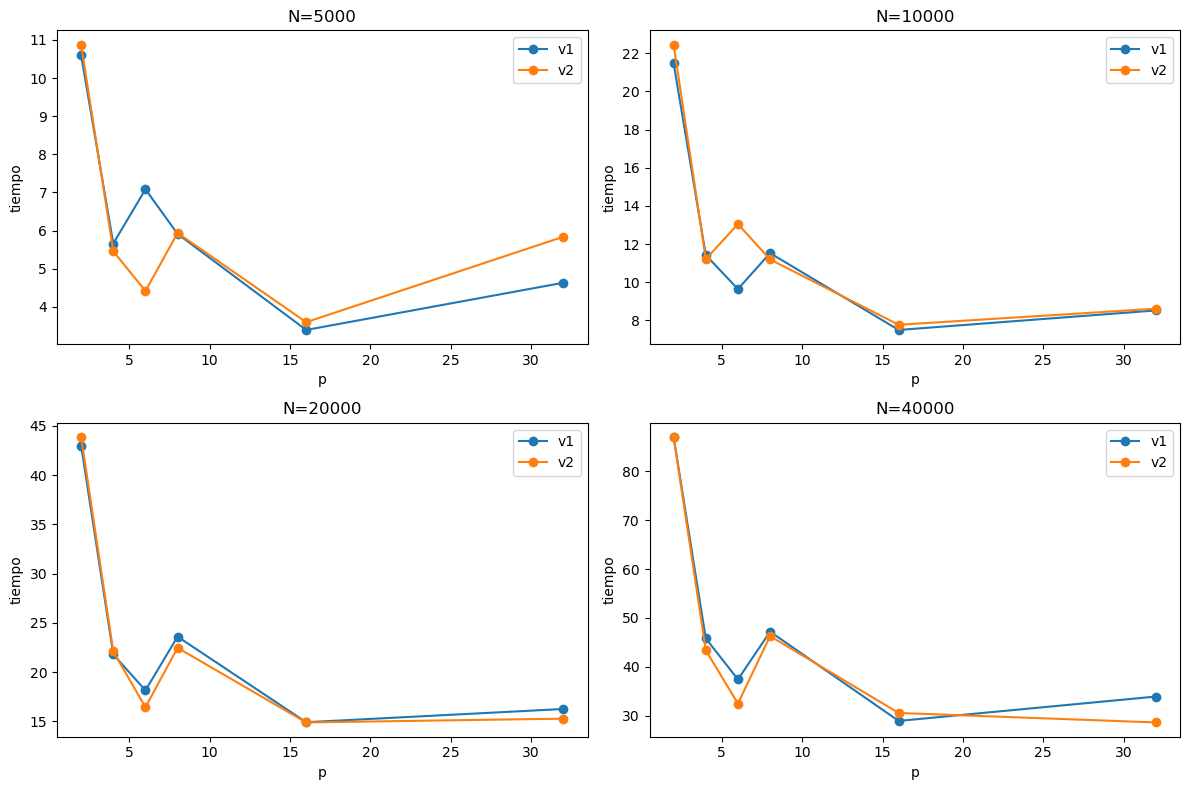

In [13]:
# comparar v1 vs v2 for all p
TIEMPOS_DIR = "./tiempos"
OUT_DIR = "./graficos"
rows = []

for version in sorted(os.listdir(TIEMPOS_DIR)):
    vpath = os.path.join(TIEMPOS_DIR, version)

    for p in sorted(os.listdir(vpath), key=int):
        csv_path = os.path.join(vpath, p, 'tiempos.csv')
        df = pd.read_csv(csv_path)
        df['p'] = int(p)
        df['version'] = version
        rows.append(df[['version', 'p', 'N', 'tiempo']])

df_all = pd.concat(rows, ignore_index=True)
agg = df_all.groupby(['version', 'p', 'N'], as_index=False)['tiempo'].mean()

Ns = sorted(agg['N'].unique())
versions = sorted(agg['version'].unique())

ncols = 2
nrows = (len(Ns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for i, N in enumerate(Ns):
    ax = axes[i]
    for v in versions:
        df_v = agg[(agg['version'] == v) & (agg['N'] == N)].copy()
        df_v = df_v.iloc[df_v['p'].argsort()]
        ax.plot(df_v['p'], df_v['tiempo'], marker='o', label=v)
    ax.set_title(f"N={N}")
    ax.set_xlabel('p')
    ax.set_ylabel('tiempo')
    ax.legend()

for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
out_path = f"{OUT_DIR}/t_vs_p_per_N.png"
fig.savefig(out_path)
print(out_path)
